# Build and test the model for predicting the resale price of a second-hand car in the UK

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("autotrader_prices_eda.csv")

## choose relevant columns

In [3]:
# Define numerical and categorical features
numerical_features = []
categorical_features = []

for feature, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

In [4]:
categorical_features

['ULEZ', 'body', 'fuel', 'transmission', 'year_reg', 'make', 'model']

In [5]:
df.head()

,BHP,ULEZ,body,engine,fuel,mileage,owners,price,transmission,year,...,performance,2dr,3dr,4dr,5dr,dsg,speed,gti,gtd,gte
0,123.0,ULEZ,Hatchback,1.4,Petrol,34414,2.0,9980,Manual,2017,...,0,0,0,0,0,0,0,0,0,0
1,114.0,ULEZ,Hatchback,1.4,Petrol,16773,2.0,11500,Manual,2017,...,0,0,1,0,0,0,0,0,0,0
2,114.0,ULEZ,Hatchback,1.6,Diesel,76922,2.0,8599,Manual,2017,...,0,0,0,0,0,0,0,0,0,0
3,114.0,ULEZ,Hatchback,1.4,Petrol,10950,2.0,12174,Manual,2017,...,0,0,0,0,1,0,0,0,0,0
4,114.0,ULEZ,Hatchback,1.6,Diesel,58278,2.0,9172,Manual,2017,...,0,0,1,0,0,0,0,0,0,0


## Encode the categorical features
* Using pandas get_dummies()

In [6]:
df_dum = pd.get_dummies(df)
df_dum.head()

,BHP,engine,mileage,owners,price,year,name_length,missing_BHP,sport,se,...,model_C-Class,model_CT,model_Golf,model_Kona,model_Mazda3,model_Mazda6,model_NX,model_Qashqai,model_Tucson,model_e-Golf
0,123.0,1.4,34414,2.0,9980,2017,65,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,114.0,1.4,16773,2.0,11500,2017,26,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,114.0,1.6,76922,2.0,8599,2017,63,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,114.0,1.4,10950,2.0,12174,2017,26,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,114.0,1.6,58278,2.0,9172,2017,25,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [7]:
X = df_dum.drop("price", axis=1)
y = df_dum["price"].values
X.shape, y.shape

((1233, 87), (1233,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((986, 87), (247, 87), (986,), (247,))

## multiple linear regression

In [11]:
# Build Ordinary Least Square (OLS) as a baseline model
import statsmodels.api as sm

In [12]:
X_sm = sm.add_constant(X_train)
model_OLS = sm.OLS(y_train, X_sm)
model_OLS.fit().summary()

D:\Apps\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 30 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:29:54   Log-Likelihood:                -8647.7
No. Observations:                 986   AIC:                         1.744e+04
Df Residuals:                     913   BIC:                         1.780e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -4.881e+05    1.7e+05     -2.878      0.004   -8.21e+05   -1.55e+05
BHP                                     21.1401      2.313      9.142      0.000      16.602      25.679
engine                                2421.7140    340.223      7.118      0.000    1754.004    3089.424
mileage                                 -0.0511      0.005     -9.623      0.000      -0.062      -0.041
owners                                 645.4027   1655.370      0.390      0.697   -2603.369    3894.175
year                                   635.0681    218.206      2.910      0.004     206.824    1063.312
name_length                            -10.3542      9.142     -1.133      0.258     -28.297       7.588
missing_BHP                            234.3677    148.384      1.579      0.115     -56.846     525.582
sport                                  292.0630    290.660      1.005      0.315    -278.376     862.502
se                                    -789.5298    227.958     -3.463      0.001   -1236.913    -342.147
amg                                   2615.2768    367.612      7.114      0.000    1893.814    3336.740
tfsi                                   696.3930   1466.708      0.475      0.635   -2182.119    3574.905
nav                                   -128.6684    216.301     -0.595      0.552    -553.173     295.837
tsi                                   1867.5922   1402.056      1.332      0.183    -884.036    4619.220
tdi                                   1117.0221   1439.884      0.776      0.438   -1708.845    3942.889
premium                                237.4226    298.370      0.796      0.426    -348.149     822.994
dci                                   1150.6983    338.235      3.402      0.001     486.890    1814.507
m sport                               1730.2184    418.497      4.134      0.000     908.890    2551.547
sportback                             -504.8513    447.241     -1.129      0.259   -1382.592     372.889
edition                               1045.6449    309.391      3.380      0.001     438.444    1652.845
tech                                   791.5884    295.583      2.678      0.008     211.488    1371.689
crdi                                  2056.8685    464.268      4.430      0.000    1145.712    2968.025
tronic                                 225.2244    344.723      0.653      0.514    -451.317     901.766
cod                                    356.7781    385.859      0.925      0.355    -400.496    1114.052
s line                                1480.9229    327.876      4.517      0.000     837.445    2124.400
bluetooth                             -407.9063    369.471     -1.104      0.270   -1133.017     317.205
leather                               

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1228.6161317565347

## Lasso regression

In [14]:
# Build linear regression model with L2 regularization
from sklearn.linear_model import Lasso

In [15]:
lm_lasso = Lasso(max_iter=10000)
lm_lasso.fit(X_train, y_train)

np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1213.874223484391

### Hyperparameter tuning on regularisation parameter alpha

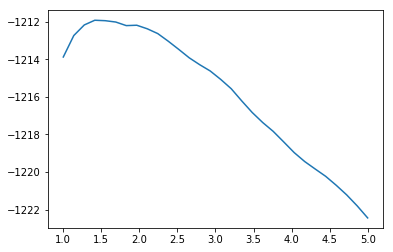

In [16]:
# tune the model for the optimisation alpha
alpha = []
error = []

for a in np.linspace(1,5,30):
    alpha.append(a)
    lm_lasso_tune = Lasso(alpha=a, max_iter=10000)
    error.append(np.mean(cross_val_score(lm_lasso_tune, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5)))

plt.plot(alpha,error)

In [17]:
# find alpha value with minimum mean absolute error
err = list(zip(alpha,error))
df_err = pd.DataFrame(err, columns=["alpha","error"])
df_err[df_err.error == np.max(df_err.error)]

,alpha,error
3,1.413793,-1211.915347


In [18]:
lm_lasso = Lasso(alpha=1.413793, max_iter=10000)
lm_lasso.fit(X_train, y_train)
np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1211.9153465263046

## RandomForestRegressor

In [19]:
# build a random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

np.mean(cross_val_score(rf, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1255.4055573623596

## hyperparameter tuning

In [20]:
# tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": range(10,300,10),
          "criterion":["mse", "mae"],
          "max_features":["auto", "sqrt", "log2"]}

gs = GridSearchCV(rf, params, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 300, 10), 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [21]:
gs.best_score_

-1195.853718728871

In [22]:
gs.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 180}

## test ensembles

In [23]:
# predict prices on test set
pred_lm = lm.predict(X_test)
pred_lm_lasso = lm_lasso.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error
valuation = {"Linear Regression": mean_absolute_error(y_test, pred_lm),
             "Lasso Regression": mean_absolute_error(y_test, pred_lm_lasso),
             "RandomForestRegressor": mean_absolute_error(y_test, pred_rf)}
valuation

{'Linear Regression': 1169.792098653403,
 'Lasso Regression': 1168.529278650862,
 'RandomForestRegressor': 1180.4008771929825}

# Deploy the model into production using pickle

In [27]:
# pickle the model
import pickle
auto_estimator = {'model': lm_lasso}
pickle.dump(auto_estimator, open('model_file' + ".p", "wb"))

In [28]:
# test the pickled model for prediction

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(X_test.iloc[0,:].values.reshape(1,-1))

array([12713.61391287])